In [62]:
from roboflow import Roboflow
import supervision as sv
import cv2


import matplotlib.pyplot as plt
from PIL import Image 
import io 


In [30]:

rf = Roboflow(api_key="wrNmIilZnQ3q9s6VsVxd")
project = rf.workspace().project("openvission")
# Initialize the box annotator
box_annotator = sv.BoxAnnotator()


loading Roboflow workspace...
loading Roboflow project...


In [27]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="wrNmIilZnQ3q9s6VsVxd"
)

result = CLIENT.infer("/home/ricmwas/Documents/openvision/AgACAgQAAxkBAAOUZpAeVWSI6N4vvfKbx8qORvF3lxoAAlzCMRuYroBQqIaEudn4spYBAAMCAAN5AAM1BA.jpg", model_id="openvission/2")
detections = sv.Detections.from_inference(result)

print(len(detections))

# filter by class
detections = detections[detections.class_id == 0]
print(len(detections))

10
1


In [33]:
detections

Detections(xyxy=array([[187.5 , 860.  , 302.5 , 977.5 ],
       [691.25, 633.75, 826.25, 771.25],
       [618.75, 777.5 , 750.  , 911.25],
       [548.75, 602.5 , 656.25, 713.75],
       [481.25, 390.  , 612.5 , 523.75],
       [316.25, 426.25, 451.25, 561.25],
       [176.25, 620.  , 320.  , 756.25],
       [652.5 , 443.75, 783.75, 577.5 ],
       [355.  , 625.  , 502.5 , 778.75],
       [430.  , 810.  , 580.  , 967.5 ]]), mask=None, confidence=array([0.9868896 , 0.97333461, 0.96697879, 0.9650088 , 0.96029437,
       0.95862722, 0.95829803, 0.9516781 , 0.9305855 , 0.90349931]), class_id=array([3, 0, 1, 3, 1, 1, 1, 1, 2, 2]), tracker_id=None, data={'class_name': array(['Ksh 5', 'Ksh 1', 'Ksh 10', 'Ksh 5', 'Ksh 10', 'Ksh 10', 'Ksh 10',
       'Ksh 10', 'Ksh 20', 'Ksh 20'], dtype='<U6')})

SupervisionWarnings: from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.22.0`. Use `Detections.from_inference` instead.
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


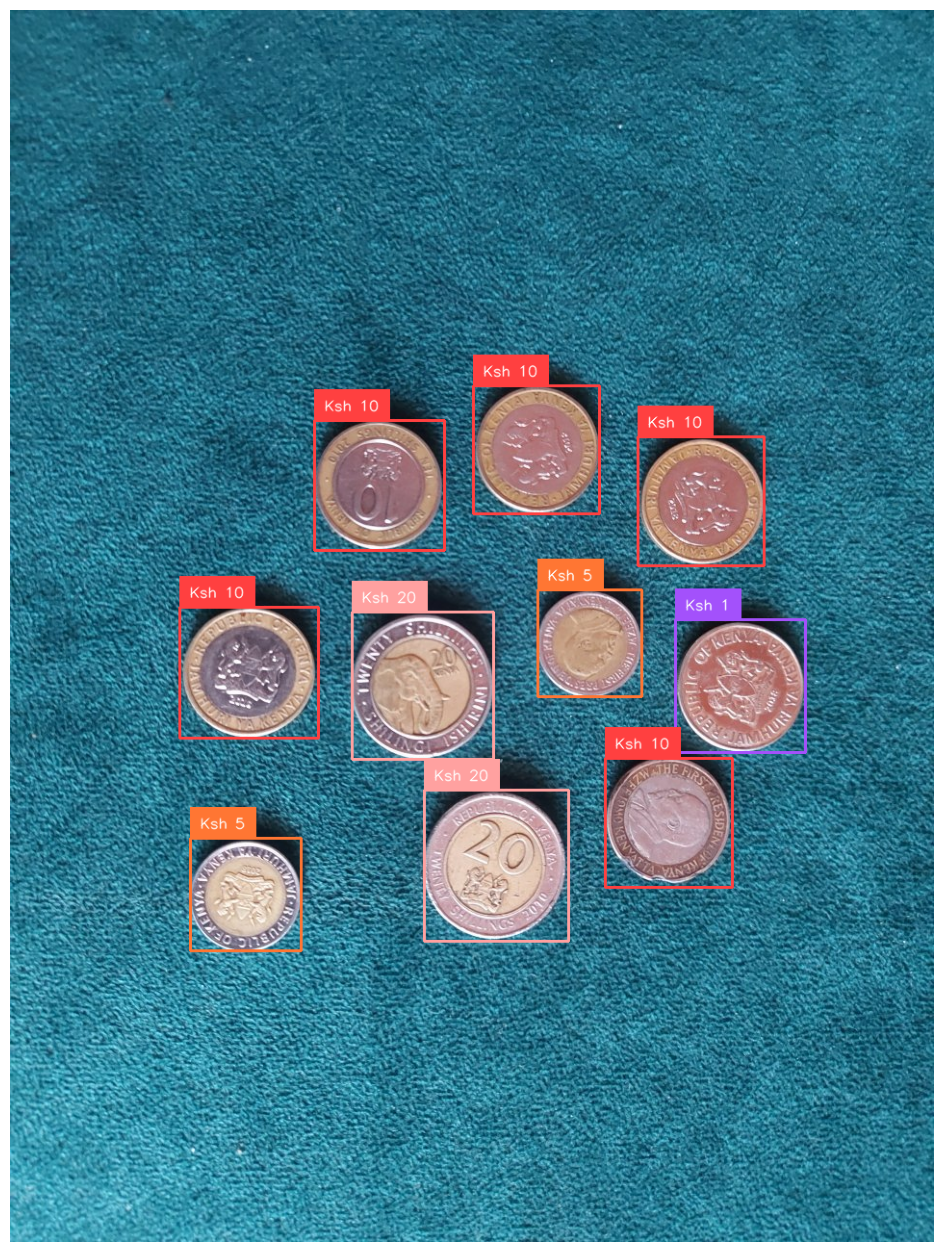

In [46]:
labels = [item["class"] for item in result["predictions"]]
# Initialize the box annotator
box_annotator = sv.BoxAnnotator()

detections = sv.Detections.from_roboflow(result)

label_annotator = sv.LabelAnnotator()
bounding_box_annotator = sv.BoxAnnotator()

image = cv2.imread("/home/ricmwas/Documents/openvision/AgACAgQAAxkBAAOUZpAeVWSI6N4vvfKbx8qORvF3lxoAAlzCMRuYroBQqIaEudn4spYBAAMCAAN5AAM1BA.jpg")

annotated_image = box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

#sv.plot_image(image=annotated_image, size=(16, 16))

# Plot the annotated image using matplotlib and save it
plt.figure(figsize=(16, 16))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')  # Hide the axis
plt.savefig('annotated_image.png', bbox_inches='tight', pad_inches=0)  # Save the plot as an image file
plt.show()  # Display the image

In [ ]:
labels = [item["class"] for item in result["predictions"]]

detections = sv.Detections.from_roboflow(result)

label_annotator = sv.LabelAnnotator()
bounding_box_annotator = sv.BoxAnnotator()

image = cv2.imread("your_image.jpg")

annotated_image = box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(16, 16))

In [70]:

file_path = "20240703_152150.jpg"

def process_image(file_path):
    result = CLIENT.infer(file_path, model_id="openvission/2")
    detections = sv.Detections.from_inference(result)

    # filter by class
    detections = detections[detections.class_id == 0]
    #print(len(detections))


    labels = [item["class"] for item in result["predictions"]]
    # Initialize the box annotator
    box_annotator = sv.BoxAnnotator()

    detections = sv.Detections.from_roboflow(result)

    label_annotator = sv.LabelAnnotator()
    bounding_box_annotator = sv.BoxAnnotator()

    image = cv2.imread(file_path)

    annotated_image = box_annotator.annotate(
        scene=image, detections=detections)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections, labels=labels)

    #sv.plot_image(image=annotated_image, size=(16, 16))

    # Plot the annotated image using matplotlib and save it
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.axis('off')  # Hide the axis
   
    # Getting the current figure and save it in the variable. 
    fig = plt.gcf() 
    plt.close()  # Close the plot to avoid displaying it
    return [fig,labels]
   

#process_image(file_path)

# sv.plot_image()

def fig2img(fig): 
    buf = io.BytesIO() 
    fig.savefig(buf) 
    buf.seek(0) 
    img = Image.open(buf) 
    return img 
  
  
# # Save return image in a variable by passing 
# # plot in the created function for Converting a plot to a PIL Image. 
#img = fig2img(process_image(file_path)[0]) 

process_image(file_path)[1]
# Save image with the help of save() Function. 
# img.save('Plot image.png') 



SupervisionWarnings: from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.22.0`. Use `Detections.from_inference` instead.
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


['Ksh 5',
 'Ksh 1',
 'Ksh 10',
 'Ksh 5',
 'Ksh 10',
 'Ksh 10',
 'Ksh 10',
 'Ksh 10',
 'Ksh 20',
 'Ksh 20']

In [74]:
import re

# List of strings with currency
# Count the number of coins 
def count_coins(lst):
    # Extract numbers and sum them
    total_sum = sum(int(re.search(r'\d+', item).group()) for item in lst)

    results= {"Number of coin": len(lst),
              "Total amount ": total_sum}
    return results

In [75]:
count_coins(process_image(file_path)[1])

SupervisionWarnings: from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.22.0`. Use `Detections.from_inference` instead.
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
